In [ ]:
from utils.binaries import *
from utils.plotting import *
from utils import CONSTANTS
from utils.Auger.SD import SdHisto

In [ ]:
def read_file(path):

    path = f'/cr/data01/filip/Data/muonAcquisition/night/' + path
    coinc_hist = lambda x : np.array([int(e.split(' ')[-4]) for e in x]) # ...
    all_hist = lambda x : np.array([int(e.split(' ')[-1]) for e in x])
    peak_histo, rates = [], []

    with open(path, 'r') as source:

        baseline = 0

        is_peak_histogram = False
        is_all_histogram = False
        for i, line in enumerate(source.readlines()):
            line = line.strip()

            if line.startswith('Offset'):
                baseline = int(line.split(' ')[-1])

            if line == 'Peak': 
                is_peak_histogram = True
                continue
            elif line == 'Charge':
                is_peak_histogram = False
            
            if is_peak_histogram: peak_histo.append(line)
            if line == '======ssd:':
                is_all_histogram = True
                continue

            if is_all_histogram: rates.append(line)

        peak_histo = np.array(coinc_hist(peak_histo))
        bin0 = int(rates[0].split(' ')[3])

    return peak_histo, all_hist(rates[1:]), bin0 - baseline



In [ ]:
_, ssd_enable, bins = read_file("1714040526_643")
ssd_disable = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v40/peak.txt')[3, 4:]

In [ ]:
set_plt_style('double tex')


X = np.linspace(25, 75, 50)
popts = SdHisto.fit_ssd(ssd_disable[:99])
pcov = uncertainties.correlation_matrix(popts)
pvals = [p.n for p in popts]

err_up, err_down = tools.bootstrap_ci(SdHisto.parabola, pvals, pcov, X, ci=0.4)
mip = popts[1]


plt.ylim(0, 3000)
plt.xlim(0, 200)

plt.scatter([], [], c='k', marker='s', label=f"${mip.n:.2f}\pm{mip.std_dev:.1f}\,\mathrm{{ADC}}$")
plt.plot(X, SdHisto.parabola(X, *pvals), c='k', ls=':', lw=0.7)
plt.fill_between(X, err_up, err_down, alpha=0.1)
plt.plot(CONSTANTS.UUB_SSD_PEAK, ssd_disable, label='WCD selected')
plt.plot(range(70, 70 + len(ssd_enable) - 1), ssd_enable[1:] * 2, label='all events')

plt.title('Peak Histogram')
plt.ylabel('Occurences')
plt.xlabel('max. pulse height / ADC')
plt.legend(loc=0, facecolor='w', framealpha=1)
# plt.yscale('log')


In [1]:
from utils.binaries import *
from utils.plotting import *

vertical, vertical_err = np.zeros((2, 80))
omnidirectional, omnidirectional_err = np.zeros((2, 400))

def read(line: str) -> tuple[int, float]:
    idx, val = line.split(',')
    idx = idx.split('(')[-1]
    val = val.split(')')[0]

    return int(idx) - 2, float(val)

with open('unnamed.c.C', 'r') as f:
    lines = f.readlines()

for line in lines:
    if line.startswith('   hChargeSSD__1->SetBinContent'):
        idx, val = read(line.rstrip())
        vertical[idx] = val
    elif line.startswith('   hChargeSSD__1->SetBinError'):
        idx, val = read(line.rstrip())
        vertical_err[idx] = val
    elif line.startswith('   hCalibChargeSSD__2->SetBinContent'):
        idx, val = read(line.rstrip())
        omnidirectional[idx] = val
    elif line.startswith('   hCalibChargeSSD__2->SetBinError'):
        idx, val = read(line.rstrip())
        omnidirectional_err[idx] = val

14:09:47 (   +2.5s) [INFO   ] -- import logging
14:09:47 (    +1ms) [INFO   ] -- import numpy as np
14:09:47 (    +6ms) [INFO   ] -- import uncertainties
14:09:47 (    +1ms) [INFO   ] -- import numpy as np
14:09:47 (    +6ms) [INFO   ] -- import uncertainties
14:09:47 (  +258ms) [INFO   ] -- import pandas as pd
14:09:47 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
14:09:47 (    +2ms) [INFO   ] -- import binaries.tools as tools
14:09:47 (  +338ms) [INFO   ] -- import matplotlib.pyplot as plt
14:09:48 (  +416ms) [INFO   ] -- import seaborn as so
14:09:48 (    +5ms) [INFO   ] -- import plotting.tools as plot
14:09:48 (    +9ms) [DEBUG  ] -- font size set to 9.5
14:09:48 (    +1ms) [DEBUG  ] -- label size set to 13.0
14:09:48 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
14:09:48 (    +1ms) [DEBUG  ] -- markersize set to 2.0
14:09:48 (    +1ms) [DEBUG  ] -- usetex set to False


14:11:19 (  +13.0s) [DEBUG  ] -- font size set to 9.5
14:11:19 (    +2ms) [DEBUG  ] -- label size set to 13.0
14:11:19 (    +1ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
14:11:19 (    +1ms) [DEBUG  ] -- markersize set to 2.0
14:11:19 (    +2ms) [DEBUG  ] -- usetex set to True


Text(0, 1.03, 'Preliminary')

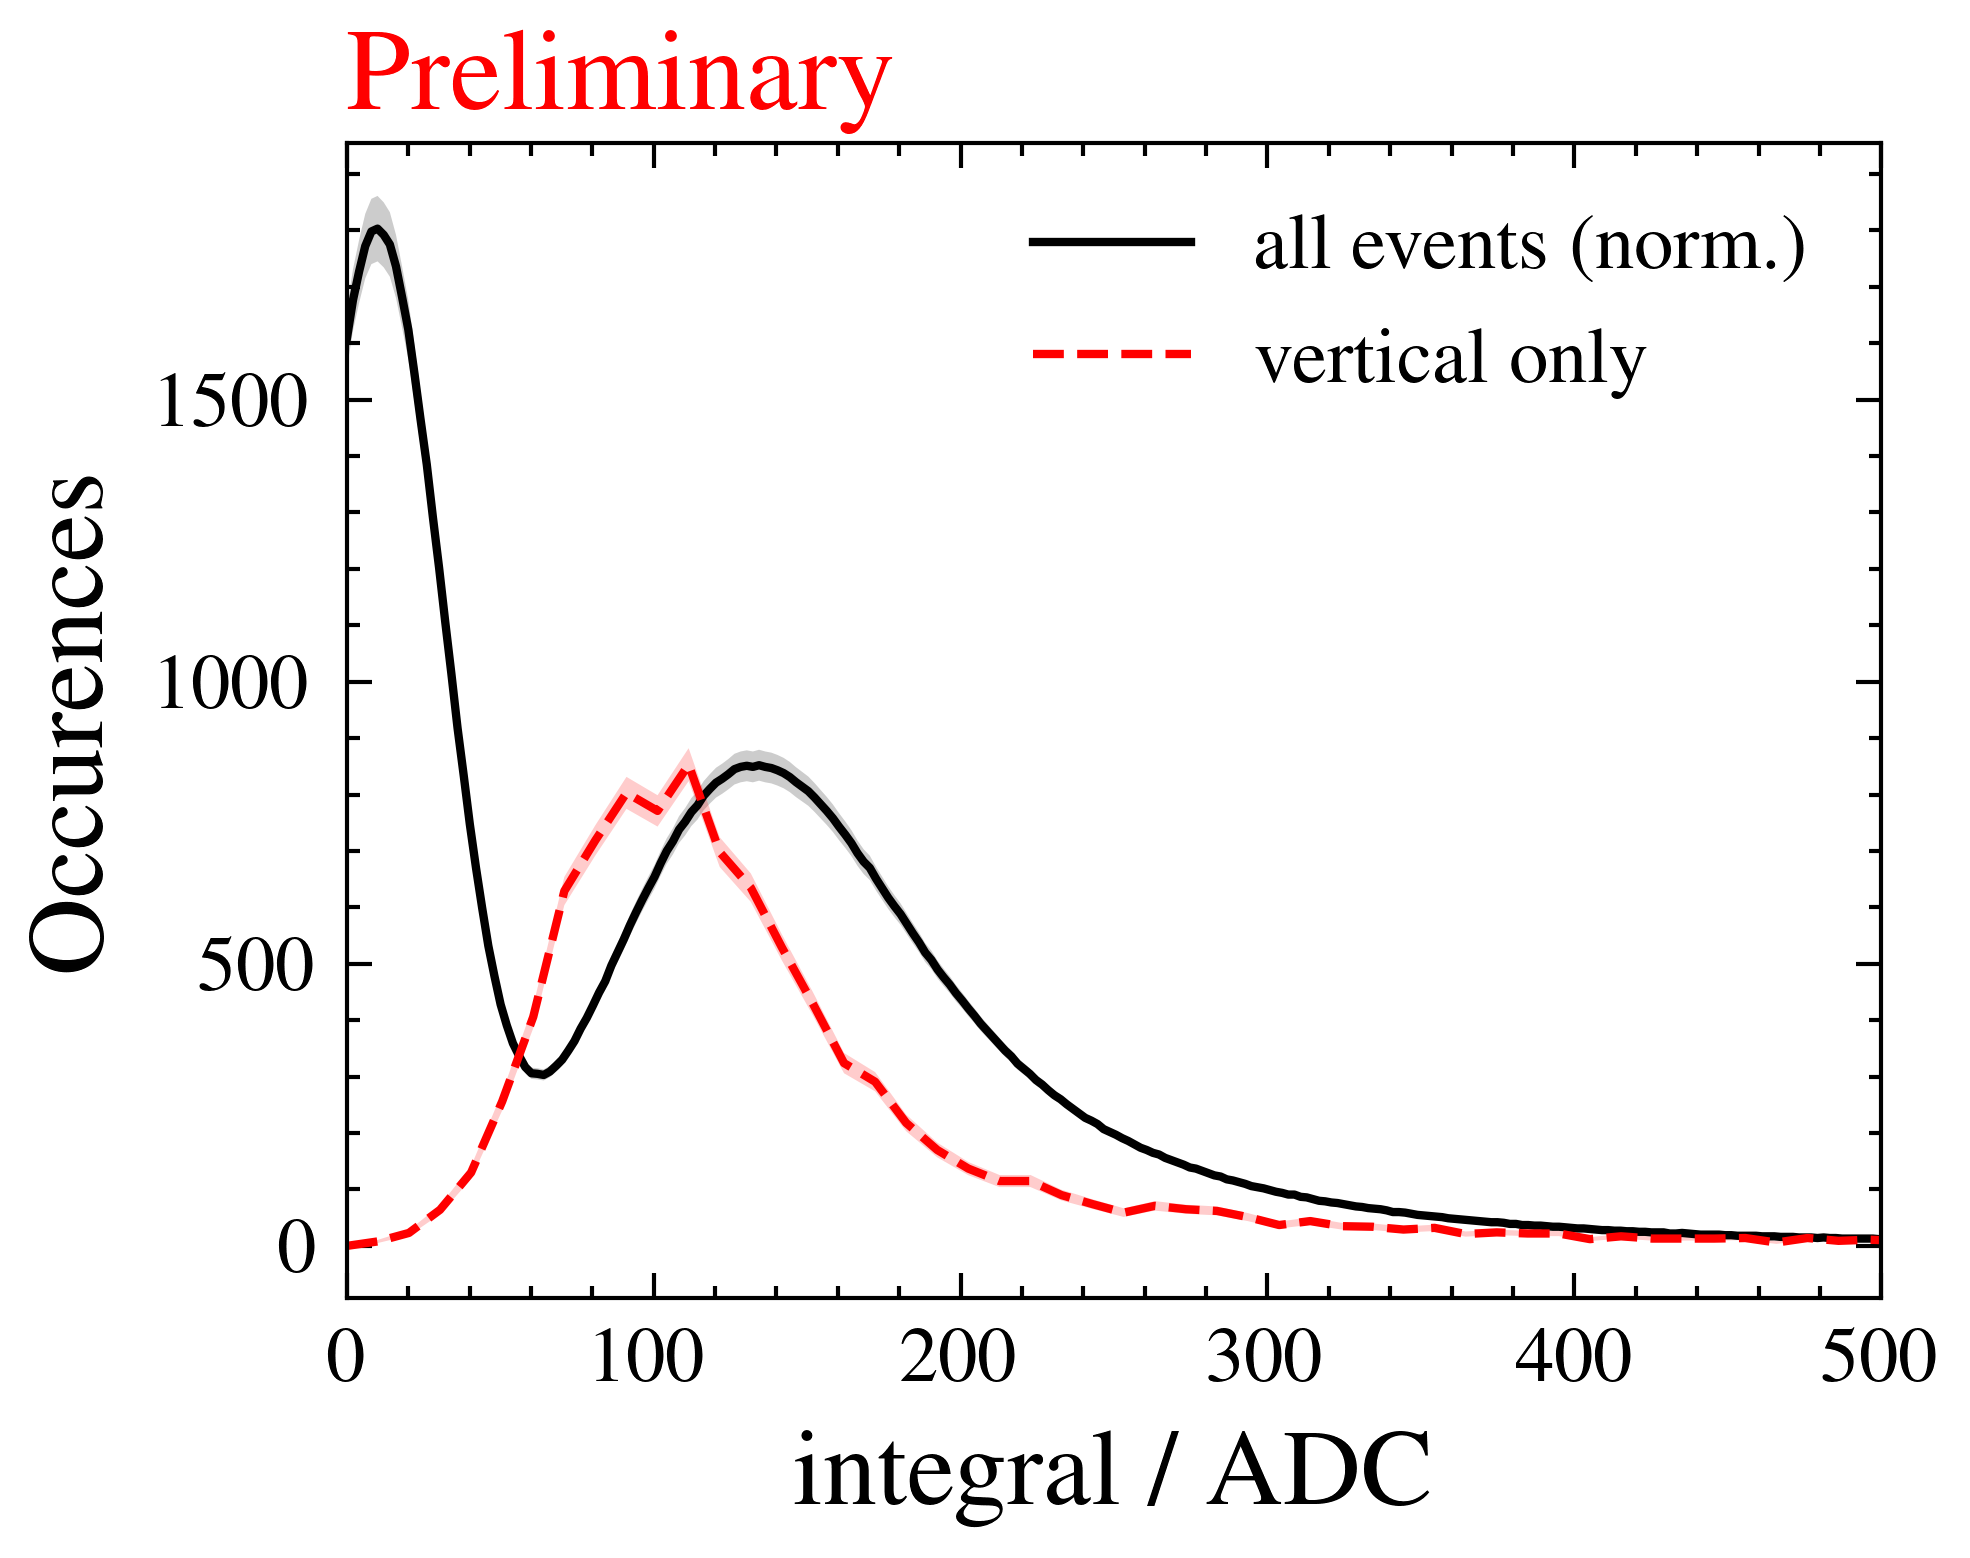

In [6]:
set_plt_style('double tex')

bins_vertical = np.linspace(0, 800, 80)
bins_omnidirectional = np.linspace(0, 800, 400)

f = 1
plt.plot(bins_omnidirectional, f * omnidirectional, label='all events (norm.)')
plt.fill_between(bins_omnidirectional, f * (omnidirectional - omnidirectional_err), f * (omnidirectional + omnidirectional_err), alpha=0.2)

plt.plot(bins_vertical, vertical, label='vertical only')
plt.fill_between(bins_vertical, vertical - vertical_err, vertical + vertical_err, alpha=0.2)

plt.xlabel('integral / ADC')
plt.ylabel('Occurences')
plt.xlim(0, 500)
plt.legend()

plt.text(0, 1.03, 'Preliminary',
         transform=plt.gca().transAxes,
         c='red', fontsize=14)

# plot.preliminary(plt.gcf(), fontsize=16)